# Transportation Operations and Solutions Question
1) The Bureau of Public Roads flow curve, or "BPR Curve", relates traffic density to vehicle speed, similar to the speed/flow/density models presented in Chapter 7 in Vanek et al. **Sustainable Transportation Engineering**. The BPR curve equation is as follows: 

$ t = t_{0} \Bigg( 1 + \alpha(\frac v v_{c}) \Bigg)^\beta $

$ t $ = travel time <br/>
$ t_{0} $ = free-flow travel time <br/>
$ v $ = volume (cars / hour) <br/>
$ v_{c} $ = practical capacity (cars / hour) <br/>
$ \beta $ = Parameters derived from travel surveys to fit data for a particular roadway

In this problem, you will model a 30-mile highway with three lanes of inbound traffic. The single-direction capacity is 2500 $ vehicles / lane / hr $. 

Traffic survey data fits produced values of $ \alpha $ = 1.5 and $ \beta $ = 4, and a free-dlow vehicle velocity of 60 mph. Value lost time due to congestion at $12/hr and assume one occupant per vehicle. Throughout this problem, ignore transition effects between peak and non-peak conditions

### a) Plot $ t $ as a function of $ v $ for traffic volume values from 0 to 3000 $ cars / lane / hr $

In [1]:
import pandas as pd
import math
import os
import sys

In [11]:
VOLUME_PRACTICAL_CAPACITY_PER_LANE = 2500. # 3 lanes @ 2500 vehicles / lane / hr
# At 60 mph, a 30-mile highway would take 30 minutes
FREE_FLOW_TRAVEL_TIME = 30. # minutes
ALPHA = 1.5
BETA = 4.
NUM_LANES = 3.
HIGHWAY_LENGTH = 30. # miles 
VALUE_LOST_DUE_TO_CONGESTION = 12. # $ /hr

def get_travel_time(free_flow_travel_time, volume_cars_per_hr, volume_practical_capacity, alpha, beta):
    
    inner_term = 1 + (alpha * (volume_cars_per_hr / volume_practical_capacity)**beta)
    travel_time = free_flow_travel_time * inner_term
    
    return travel_time

In [14]:
rows = []

for volume_cars_per_hr in range(0, 3001):
    row = {
        "t" : get_travel_time(
            FREE_FLOW_TRAVEL_TIME, 
            NUM_LANES * volume_cars_per_hr, 
            VOLUME_PRACTICAL_CAPACITY_PER_LANE * NUM_LANES, 
            ALPHA, BETA
        ),
        "v" : NUM_LANES * volume_cars_per_hr,
        "inner_term" : 1 + (ALPHA * ((NUM_LANES * volume_cars_per_hr) \
             / (VOLUME_PRACTICAL_CAPACITY_PER_LANE * NUM_LANES))**BETA),
        "volume_practical_capacity": VOLUME_PRACTICAL_CAPACITY_PER_LANE * NUM_LANES,
        "volume" : NUM_LANES * volume_cars_per_hr,
        "free_flow_travel_time": FREE_FLOW_TRAVEL_TIME
    }
    
    rows.append(row)

travel_time_df = pd.DataFrame(rows)
travel_time_df["veh_per_lane_per_hr"] = travel_time_df["v"] / NUM_LANES

<AxesSubplot:xlabel='volume (veh / lane / hr)', ylabel='time (minutes)'>

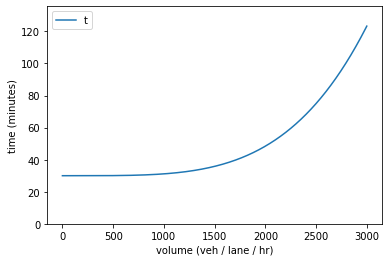

In [15]:
travel_time_df.plot("veh_per_lane_per_hr", "t", 
    xlabel = "volume (veh / lane / hr)", 
    ylabel ="time (minutes)", 
    ylim=[0, max(travel_time_df["t"]) + .1 * (max(travel_time_df["t"]))], 
    kind = "line"
)

### b) Suppose 2000 cars per lane per hour travel in the morning rush hour for a 2-hour rush period each workday morning. What is their average speed?

In [18]:
NUM_VEHICLES_PER_LANE = 2000.
NUM_PEOPLE_PER_VEHICLE = 1.
NUM_HOURS_RUSH_HOUR = 2.

travel_time_in_minutes = get_travel_time(
    FREE_FLOW_TRAVEL_TIME, 
    NUM_VEHICLES_PER_LANE * NUM_LANES, 
    VOLUME_PRACTICAL_CAPACITY_PER_LANE * NUM_LANES, 
    ALPHA, 
    BETA
)

In [19]:
average_mph = (60 / travel_time_in_minutes) * HIGHWAY_LENGTH

print("{:.2f} mph at average travel time of {:.2f} minutes".format(average_mph, travel_time_in_minutes))

37.17 mph at average travel time of 48.43 minutes


### c) What is the value of time lost in one morning compared to the same situation where the same number of cars travel the length of the road in time $ t_0 $?

This assumes that value lost due to congestion is $12/hour _per person_

In [20]:
additional_travel_time_per_person_mins = travel_time_in_minutes - FREE_FLOW_TRAVEL_TIME
additional_travel_time_per_person_hr = additional_travel_time_per_person_mins / 60.

In [21]:
value_of_time_lost = additional_travel_time_per_person_hr \
    * (NUM_LANES * NUM_VEHICLES_PER_LANE * NUM_PEOPLE_PER_VEHICLE) \
    * NUM_HOURS_RUSH_HOUR

print("Total value of time lost per morning: ${:,.2f}".format(value_of_time_lost))

Total value of time lost per morning: $3,686.40


### d) The cost of building a highway in an urban setting is about $11 mil per mile. How long would it take to recover those costs in time saved if an extra lane of traffic were built? 

In [22]:
travel_time_in_minutes_w_addtl_capacity = get_travel_time(
    FREE_FLOW_TRAVEL_TIME, 
    NUM_VEHICLES_PER_LANE * NUM_LANES, 
    VOLUME_PRACTICAL_CAPACITY_PER_LANE * 4, 
    ALPHA, 
    BETA
)

In [23]:
print("Rush hour travel time without new lane: {:,.2f}".format(travel_time_in_minutes))
print("Rush hour travel time with new lane: {:,.2f}".format(travel_time_in_minutes_w_addtl_capacity))

print("Number of minutes saved per vehicle with additional lane: {:,.2f}".format(
    travel_time_in_minutes - travel_time_in_minutes_w_addtl_capacity
))

Rush hour travel time without new lane: 48.43
Rush hour travel time with new lane: 35.83
Number of minutes saved per vehicle with additional lane: 12.60


In [24]:
num_hours_saved_per_vehicle = (travel_time_in_minutes - travel_time_in_minutes_w_addtl_capacity)  \
    / 60 \
    * NUM_PEOPLE_PER_VEHICLE

amount_saved_per_person = num_hours_saved_per_vehicle * VALUE_LOST_DUE_TO_CONGESTION
amount_saved_per_person_per_morning = amount_saved_per_person * NUM_HOURS_RUSH_HOUR

amount_saved_per_morning = amount_saved_per_person_per_morning \
    * NUM_LANES \
    * NUM_VEHICLES_PER_LANE \
    * NUM_PEOPLE_PER_VEHICLE

total_cost_of_additional_lane_in_mm = 11 * HIGHWAY_LENGTH

In [25]:
num_days_to_recup_costs = round((total_cost_of_additional_lane_in_mm * 1000000) / amount_saved_per_morning, 0)

print("Number of years to recup costs: {:,.2f}".format(num_days_to_recup_costs / 365))

Number of years to recup costs: 29.90


# Vehicle Load Equation and Fuel Demand
2) A MATLAB script file (ENGY502_vehicle_drivecalcs_F2021.m) and an MS Excel file (ENGY502_vehicle_drivecalcs_F2021.xslx) provide a means for calculating the transient load and rate of fuel consumption for a ground vehicle for a given drive-cycle. The load $ W_{veh} $ and the rate of fuel energy consumed $ \frac {dE_{fuel}} {dt} $  (shown in equation 1) are integrated

$ \frac {dE_{fuel}} {dt} = \frac {1} {\eta_{tr}} \Bigg( \Bigg[ m_{veh} \Bigg(max(0, \frac {dv_{veh}} {dt}) + C_{roll} g \cos (\alpha_{road}) + g \sin(\alpha_{road})\Bigg) + \frac {\rho_air C_{drag} A_{veh} (v_{veh} - v_{air})^2} {2} \Bigg] + \frac {W_{acc}} {\eta_{elec}}$ 

Drive-train efficiency $\eta_{tr}(t) $ can vary with time due to changes in engine efficiency with power and RPM. This will identify power plant demands and fuel consumption $ \Delta E_{fuel} $ for various drive cycles.

Consider a Subaru Outback ($ m_{veh} = 1700 kg, A_{veh}=2.56 m^2, C_{drag} = 0.37, C_{roll} = 0.11, W_{acc} = 0.5 kW $) for this problem going through various drive cycles including the FTP-75 and HWFET drive cycles. Assuming the following simple relationship works for calculating the instantaneous $ \eta_{tr} $

$ \eta_{tr} = \alpha \Bigg[ \exp \Bigg(- \frac {W_{veh}} {W_{1}}\Bigg) - \exp \Bigg(- \frac {W_{veh}} {W_{2}}\Bigg)\Bigg] $ where $ W_{veh} $ is in kW. 

For this problem, we will assume $ a = 0.4, W_{1} = 200 kW, W_{2} = 17 kW $

In [ ]:
ALPHA = 0.4
W_1 = 200 # kW. What does W_1 represent?
W_2 = 17  # kW. What does W_2 represent?

### a) Given the data above, make a plot of fuel economy in mpg for a Subaru Outback as a function of constant vehicle speeds from 10 to 100 mph. Consider how a luggage rack adds 80 kg of mass and drag resistance. Also consider how snow tires increase rolling resistance. Using references to estimate the effects of a luggage rack and snow tires, overlay your plots of fuel economy vs. vehicle speed for an Outback with a rack, with snow tires, and with both.

**Assumption**: Horizontal Road surface. Not uphill / downhill <br/>
**Assumption**: Air density equals 1.149 <br/>
**Assumption**: Wind velocity is 0
**Assumption**: Gasoline Energy density is 34.2 MJ / l

In [2]:
sys.path.append(os.path.dirname(os.path.realpath("__file__")))

from vehicle_drivecalcs import *

DATA_DIR_BASE = os.path.join(
    os.path.dirname(os.path.realpath("__file__")),
    "data",
    "hw2"
)

RAW_DATA_DIR = os.path.join(
    DATA_DIR_BASE,
    "raw"
)

INTERIM_DATA_DIR = os.path.join(
    DATA_DIR_BASE,
    "interim"
)

constants_config = {
    GRAVITATIONAL_CONSTANT_KEY: 9.81, # m/s^2
    AIR_VELOCITY_KEY: 0, # m / s
    AIR_DENSITY_KEY: 1.149, #kg / m^3
    ROAD_ANGLE_KEY: 0, # degrees
    GASOLINE_ENERGY_DENSITY_KEY: 34.20 # MJ / l
}

vehicle_config = {
    MASS_OF_VEHICLE_KEY : 3000, # kg
    FRONTAL_AREA_OF_VEHICLE_KEY : 2.2, #m^2
    DRAG_COEFFICIENT_KEY : 0.33, # unitless
    ROLLING_RESISTANCE_KEY : 0.009, # unitless
    ACCESSORY_POWER_DEMAND_KEY : 0.6/0.7, #kW
    ENGINE_EFFICIENCY_ALPHA_CONSTANT_KEY: 0.2,
    ENGINE_EFFICIENCY_WORK_CONSTANT_1_KEY: 10000000.,
    ENGINE_EFFICIENCY_WORK_CONSTANT_2_KEY: 10.,
}

In [3]:
ftp_cycle_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "ftp_75.csv"))
full_ftp_cycle_df = create_cycle_df(ftp_cycle_df, vehicle_config, constants_config)
ftp_aggregate_stats = find_aggregate_stats(full_ftp_cycle_df)

/Users/greg.bolla/Desktop/mines/aes-engy-502/code/vehicle_drivecalcs.py:329: RuntimeWarning: invalid value encountered in double_scalars
  else x[TOTAL_FUEL_ENERGY_COLNAME] / x[TOTAL_DISTANCE_KM_COLNAME],


In [4]:
ftp_aggregate_stats

{'total_distance_traveled': 17.769437663999977,
 'max_vehicle_power_demand': 66.47786694018585,
 'avg_vehicle_power_demand': 8.185533981940148,
 'total_vehicle_energy_demand': 15.33969068215584,
 'total_fuel_energy_demand': 144.6256200390734,
 'total_fuel_consumed': 4.22881929938811,
 'avg_fuel_economy_km_per_l': 4.201985567595931,
 'avg_fuel_economy_mpg': 9.88370035282077}

In [8]:
subaru_config = {
    MASS_OF_VEHICLE_KEY : 1780, # kg
    FRONTAL_AREA_OF_VEHICLE_KEY : 2.56, #m^2
    DRAG_COEFFICIENT_KEY : 0.37, # unitless
    ROLLING_RESISTANCE_KEY : 0.011, # unitless
    ACCESSORY_POWER_DEMAND_KEY : 0.5, #kW
    ENGINE_EFFICIENCY_ALPHA_CONSTANT_KEY: 0.4,
    ENGINE_EFFICIENCY_WORK_CONSTANT_1_KEY: 200000., #W
    ENGINE_EFFICIENCY_WORK_CONSTANT_2_KEY: 17.,
}

output_array = []
for speed_mph in range(10, 110, 10):
    m_per_s = get_m_per_s_from_mph(speed_mph)

    constant_velocity_df = pd.DataFrame([{
        TIME_COLNAME: i, 
        VELOCITY_VEHICLE_MPH_COLNAME: speed_mph,
        VELOCITY_VEHICLE_M_PER_S_COLNAME: get_m_per_s_from_mph(speed_mph)} 
        for i in range(0, 11)
    ])
    
    augmented_constant_velocity_df = create_cycle_df(constant_velocity_df, subaru_config, constants_config)
    
    output_array.append({
        "mph" : speed_mph,
        "mpg" : find_aggregate_stats(augmented_constant_velocity_df)[AVG_FUEL_ECONOMY_MPG_KEY]
    })
    
output_df = pd.DataFrame(output_array)

/Users/greg.bolla/Desktop/mines/aes-engy-502/code/vehicle_drivecalcs.py:329: RuntimeWarning: invalid value encountered in double_scalars
  else x[TOTAL_FUEL_ENERGY_COLNAME] / x[TOTAL_DISTANCE_KM_COLNAME],


In [9]:
augmented_constant_velocity_df

,time_s,v_mph,v_veh_m_per_s,accel_m_per_s,delta_distance_km,total_distance_km,brake_force_n,power_demand_drag_kw,power_demand_rolling_resistance_kw,power_demand_acceleration_kw,power_demand_accessories_kw,power_demand_vehicle_kw,total_vehicle_energy_mj,average_e_veh_over_vkt_mj_per_km,eta,instant_fuel_req_kw,total_fuel_energy_mj,fuel_consumption_liters,fuel_efficiency_km_per_l,avg_fuel_mj_per_km
0,0,100,44.704,0.0,0.000000,0.000000,895.408245,0,0,0,0.5,0.5,0.0000,0.000000,0.011592,43.131784,0.000000,0.000000,NaN,NaN
1,1,100,44.704,0.0,0.044704,0.044704,895.408245,0,0,0,0.5,0.5,0.0005,0.011185,0.011592,43.131784,0.043132,0.001261,35.446639,0.964831
2,2,100,44.704,0.0,0.044704,0.089408,895.408245,0,0,0,0.5,0.5,0.0010,0.011185,0.011592,43.131784,0.086264,0.002522,35.446639,0.964831
3,3,100,44.704,0.0,0.044704,0.134112,895.408245,0,0,0,0.5,0.5,0.0015,0.011185,0.011592,43.131784,0.129395,0.003783,35.446639,0.964831
4,4,100,44.704,0.0,0.044704,0.178816,895.408245,0,0,0,0.5,0.5,0.0020,0.011185,0.011592,43.131784,0.172527,0.005045,35.446639,0.964831
5,5,100,44.704,0.0,0.044704,0.223520,895.408245,0,0,0,0.5,0.5,0.0025,0.011185,0.011592,43.131784,0.215659,0.006306,35.446639,0.964831
6,6,100,44.704,0.0,0.044704,0.268224,895.408245,0,0,0,0.5,0.5,0.0030,0.011185,0.011592,43.131784,0.258791,0.007567,35.446639,0.964831
7,7,100,44.704,0.0,0.044704,0.312928,895.408245,0,0,0,0.5,0.5,0.0035,0.011185,0.011592,43.131784,0.301922,0.008828,35.446639,0.964831
8,8,100,44.704,0.0,0.044704,0.357632,895.408245,0,0,0,0.5,0.5,0.0040,0.011185,0.011592,43.131784,0.345054,0.010089,35.446639,0.964831
9,9,100,44.704,0.0,0.044704,0.402336,895.408245,0,0,0,0.5,0.5,0.0045,0.011185,0.011592,43.131784,0.388186,0.011350,35.446639,0.964831


In [10]:
output_df

,mph,mpg
0,10,8.120042
1,20,15.688202
2,30,22.370500
3,40,27.705485
4,50,41.687907
5,60,50.025488
6,70,58.363069
7,80,66.700650
8,90,75.038232
9,100,83.375813


In [ ]:
augmented_constant_velocity_df